In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import FastICA
from pandas import DataFrame, Series
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import io
from sklearn.decomposition import FastICA

%matplotlib inline
np.set_printoptions(precision=3 , suppress= True)

In [54]:
#importing the file and defining the columns I am going to work with:
filePath = './brse.txt'
columnsName = ['YYMMMDD', '_north(m)', 'sig_n(m)']
site = pd.read_csv(filePath, usecols = columnsName, delimiter = '\s+')
site

YYMMMDD  _north(m)  sig_n(m)
0     10JUN12   0.618030  0.001061
1     10JUN13   0.621100  0.001029
2     10JUN14   0.617972  0.001061
3     10JUN15   0.617000  0.001048
4     10JUN16   0.621471  0.001038
...       ...        ...       ...
3053  19JUN30   0.779092  0.001045
3054  19JUL01   0.780153  0.001073
3055  19JUL02   0.778882  0.001036
3056  19JUL03   0.778300  0.001033
3057  19JUL04   0.779518  0.001011

[3058 rows x 3 columns]

In [55]:
#changing the dtype of 'YYMMMDD':
site['YYMMMDD'] = pd.to_datetime(site['YYMMMDD'], format='%y%b%d')
site['YYMMMDD']

0      2010-06-12
1      2010-06-13
2      2010-06-14
3      2010-06-15
4      2010-06-16
          ...    
3053   2019-06-30
3054   2019-07-01
3055   2019-07-02
3056   2019-07-03
3057   2019-07-04
Name: YYMMMDD, Length: 3058, dtype: datetime64[ns]

In [56]:
#setting 'YYMMMDD' as index:
site.set_index('YYMMMDD', inplace = True)
site

_north(m)  sig_n(m)
YYMMMDD                        
2010-06-12   0.618030  0.001061
2010-06-13   0.621100  0.001029
2010-06-14   0.617972  0.001061
2010-06-15   0.617000  0.001048
2010-06-16   0.621471  0.001038
...               ...       ...
2019-06-30   0.779092  0.001045
2019-07-01   0.780153  0.001073
2019-07-02   0.778882  0.001036
2019-07-03   0.778300  0.001033
2019-07-04   0.779518  0.001011

[3058 rows x 2 columns]

In [57]:
#creating a new instance with a new period for the time series:
sitePeriodTime = site.loc['2010-06-12':'2019-07-04']
sitePeriodTime

_north(m)  sig_n(m)
YYMMMDD                        
2010-06-12   0.618030  0.001061
2010-06-13   0.621100  0.001029
2010-06-14   0.617972  0.001061
2010-06-15   0.617000  0.001048
2010-06-16   0.621471  0.001038
...               ...       ...
2019-06-30   0.779092  0.001045
2019-07-01   0.780153  0.001073
2019-07-02   0.778882  0.001036
2019-07-03   0.778300  0.001033
2019-07-04   0.779518  0.001011

[3058 rows x 2 columns]

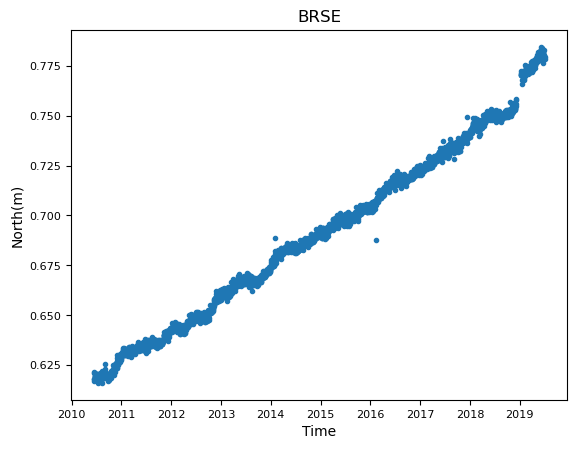

In [58]:
#checking the if the ts is stationarity for east:
plt.plot(sitePeriodTime.index, sitePeriodTime['_north(m)'], '.')
plt.title('BRSE')
plt.xlabel('Time')
plt.xticks(fontsize=8)
plt.ylabel('North(m)')
plt.yticks(fontsize=8)
plt.show()

In [59]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

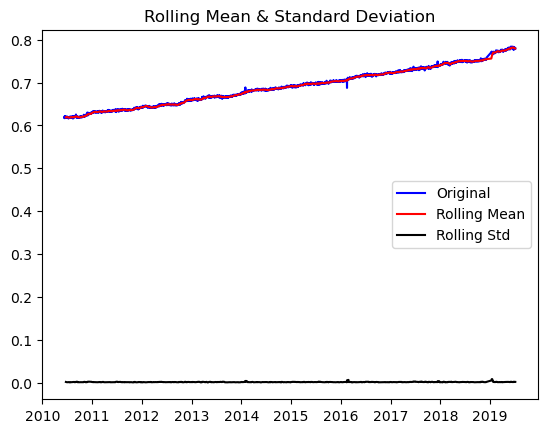

Results of Dickey-Fuller Test:
Test Statistic                    1.182169
p-value                           0.995860
#Lags Used                        9.000000
Number of Observations Used    3048.000000
Critical Value (1%)              -3.432497
Critical Value (5%)              -2.862489
Critical Value (10%)             -2.567275
dtype: float64


In [60]:
test_stationarity(sitePeriodTime['_north(m)'])

In [88]:
detrended = sitePeriodTime.sub(sitePeriodTime.mean())
detrended

_north(m)  sig_n(m)
YYMMMDD                        
2010-06-12  -0.072228  0.000030
2010-06-13  -0.069158 -0.000002
2010-06-14  -0.072286  0.000030
2010-06-15  -0.073258  0.000017
2010-06-16  -0.068787  0.000007
...               ...       ...
2019-06-30   0.088834  0.000014
2019-07-01   0.089895  0.000042
2019-07-02   0.088624  0.000005
2019-07-03   0.088042  0.000002
2019-07-04   0.089260 -0.000020

[3058 rows x 2 columns]

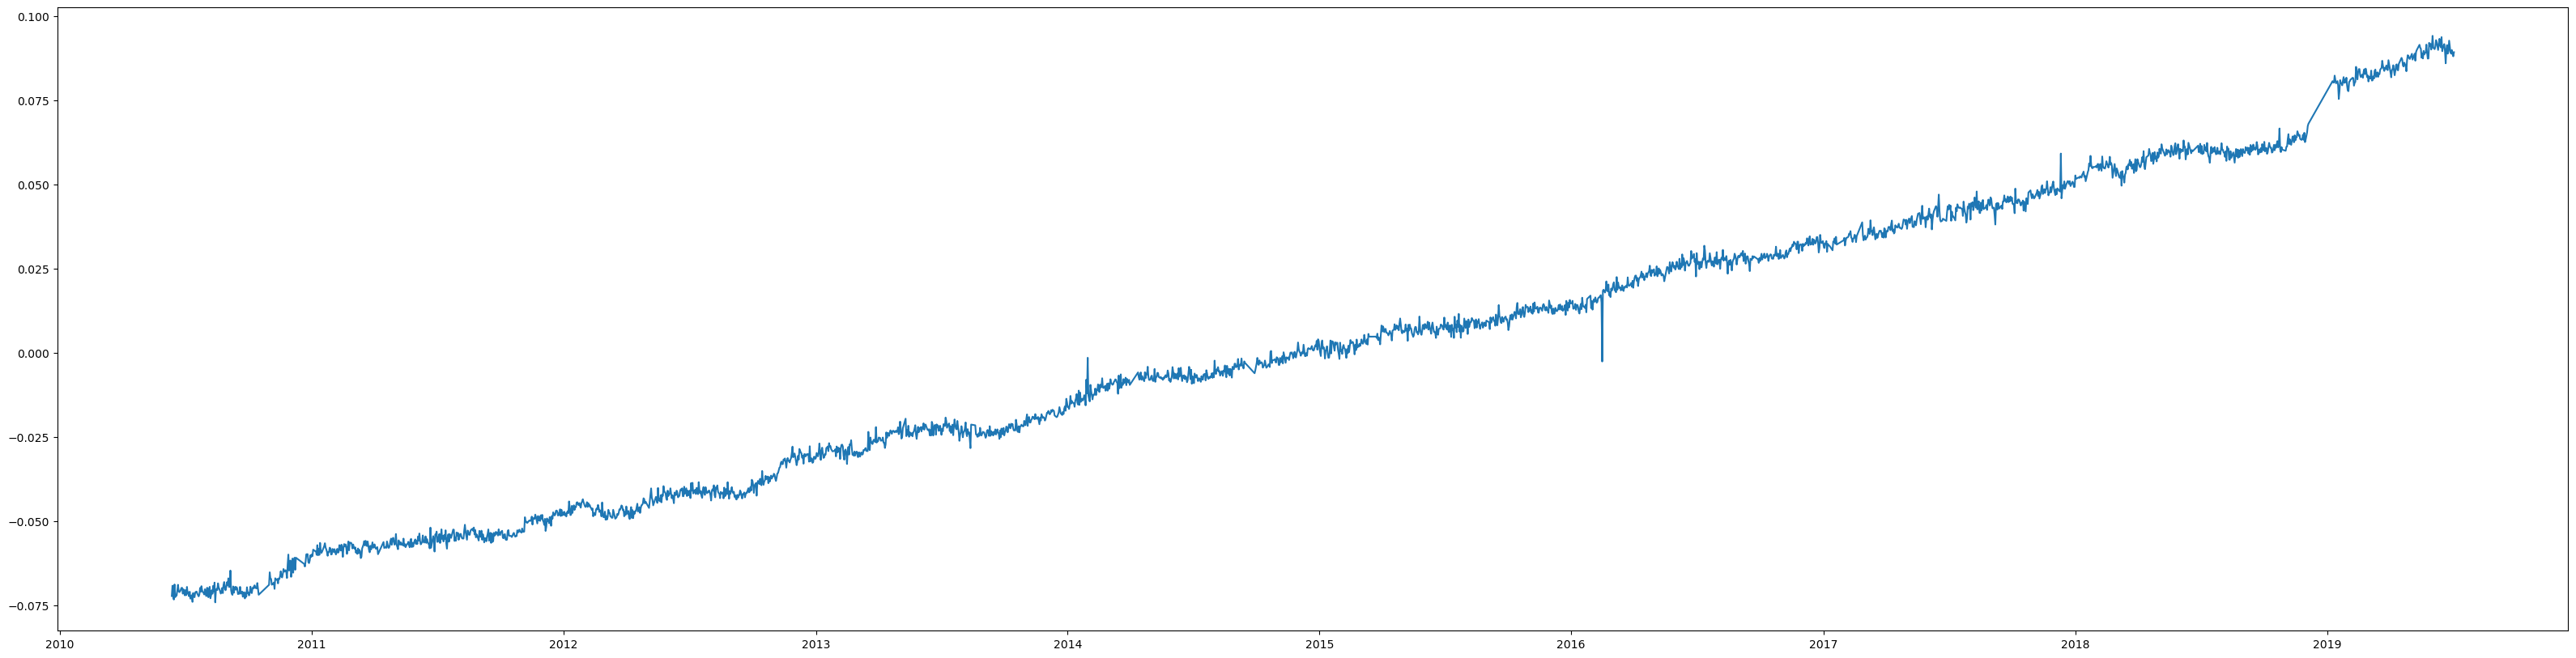

In [90]:
fig=plt.figure(figsize=(40,10))

plt.plot(detrended.index, detrended['_north(m)'])
plt.show()

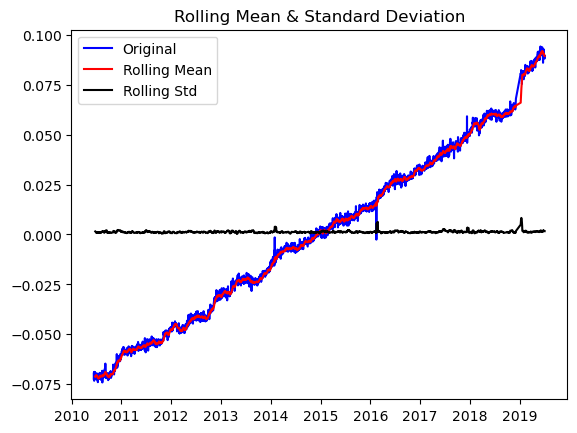

Results of Dickey-Fuller Test:
Test Statistic                    1.182169
p-value                           0.995860
#Lags Used                        9.000000
Number of Observations Used    3048.000000
Critical Value (1%)              -3.432497
Critical Value (5%)              -2.862489
Critical Value (10%)             -2.567275
dtype: float64


In [91]:
test_stationarity(detrended['_north(m)'])

In [92]:
detrended_log = np.log1p(detrended['_north(m)'])
detrended_dif = detrended_log - detrended_log.shift()
detrended_dif

YYMMMDD
2010-06-12         NaN
2010-06-13    0.003304
2010-06-14   -0.003366
2010-06-15   -0.001048
2010-06-16    0.004813
                ...   
2019-06-30   -0.000285
2019-07-01    0.000974
2019-07-02   -0.001167
2019-07-03   -0.000535
2019-07-04    0.001119
Name: _north(m), Length: 3058, dtype: float64

In [93]:
detrended_df = pd.DataFrame(detrended_dif, index=detrended_dif.index)
detrended_df

_north(m)
YYMMMDD              
2010-06-12        NaN
2010-06-13   0.003304
2010-06-14  -0.003366
2010-06-15  -0.001048
2010-06-16   0.004813
...               ...
2019-06-30  -0.000285
2019-07-01   0.000974
2019-07-02  -0.001167
2019-07-03  -0.000535
2019-07-04   0.001119

[3058 rows x 1 columns]

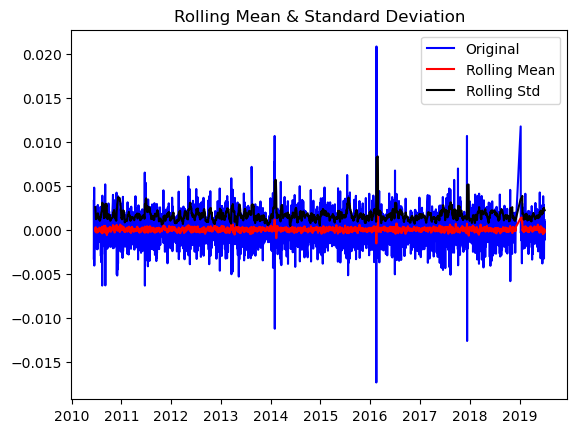

Results of Dickey-Fuller Test:
Test Statistic                  -26.725671
p-value                           0.000000
#Lags Used                        8.000000
Number of Observations Used    3048.000000
Critical Value (1%)              -3.432497
Critical Value (5%)              -2.862489
Critical Value (10%)             -2.567275
dtype: float64


In [95]:
detrended_df.dropna(inplace = True)
test_stationarity(detrended_df['_north(m)'])

In [191]:
detrended_df = pd.DataFrame(detrended_df, index=detrended_df.index)

limiarZ = 2.0
detrended_df_noOut = detrended_df[(np.abs(detrended_df-detrended_df.mean()) 
                                              < limiarZ*detrended_df.std())]
detrended_df_noOut

_north(m)
YYMMMDD              
2010-06-13   0.003304
2010-06-14  -0.003366
2010-06-15  -0.001048
2010-06-16        NaN
2010-06-17        NaN
...               ...
2019-06-30  -0.000285
2019-07-01   0.000974
2019-07-02  -0.001167
2019-07-03  -0.000535
2019-07-04   0.001119

[3057 rows x 1 columns]

In [192]:
detrended_df_noOut.dropna(inplace=True)
detrended_df_noOut

_north(m)
YYMMMDD              
2010-06-13   0.003304
2010-06-14  -0.003366
2010-06-15  -0.001048
2010-06-18   0.000739
2010-06-19  -0.000256
...               ...
2019-06-30  -0.000285
2019-07-01   0.000974
2019-07-02  -0.001167
2019-07-03  -0.000535
2019-07-04   0.001119

[2933 rows x 1 columns]

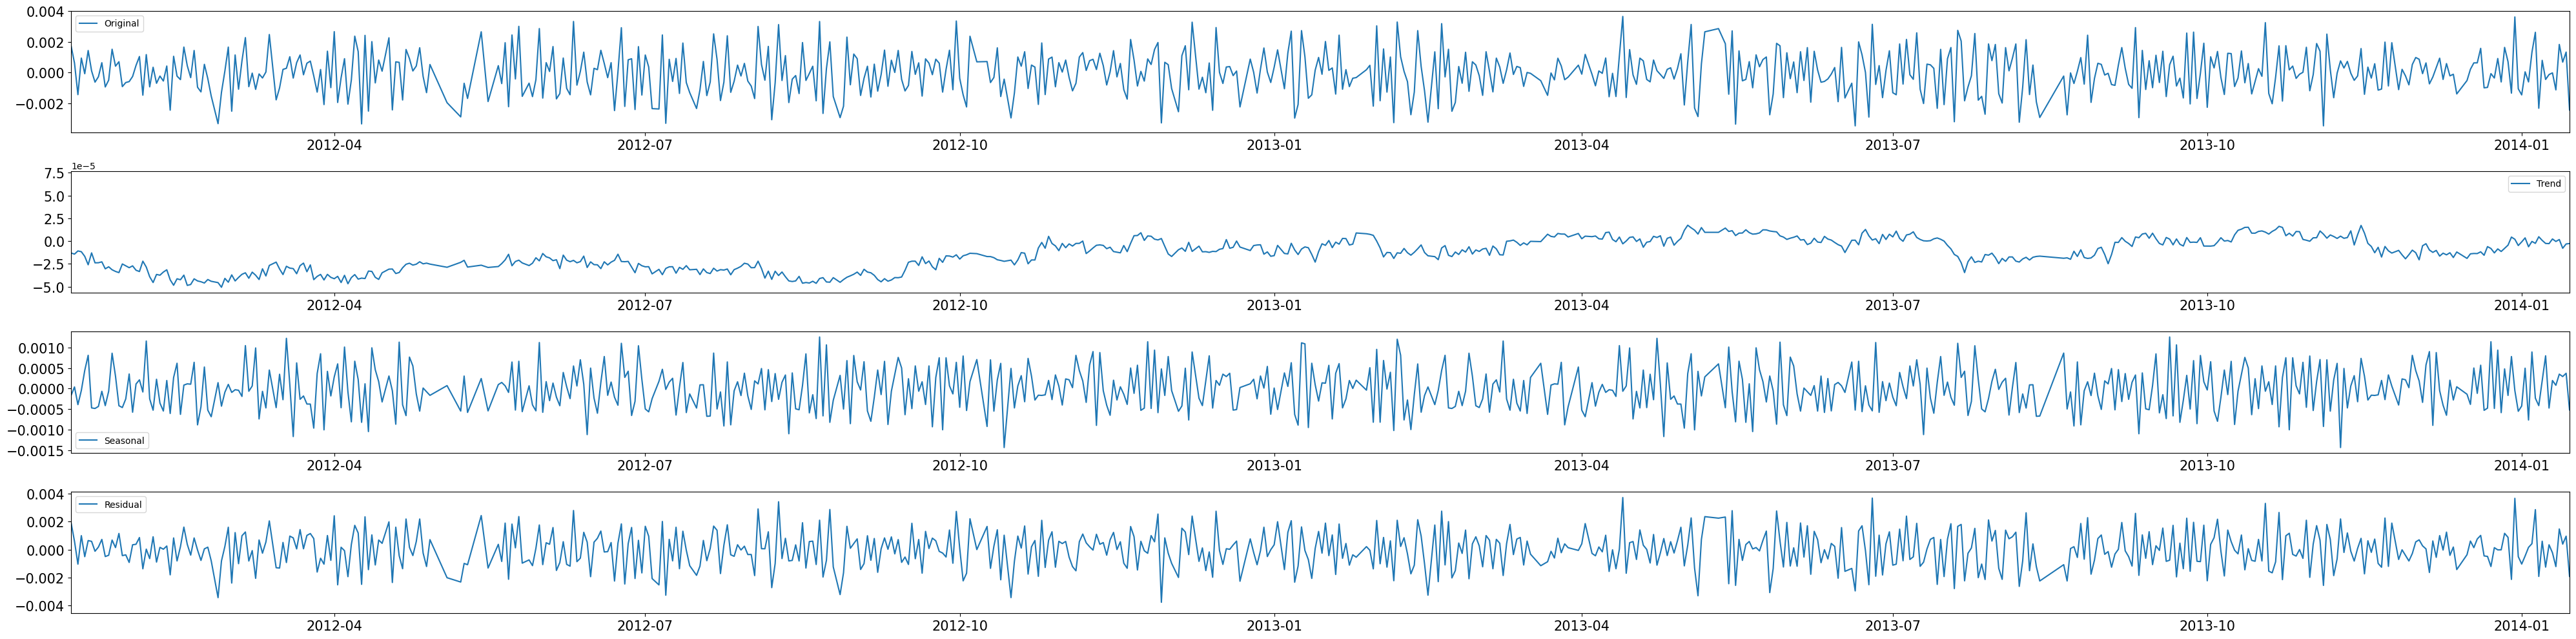

In [193]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompositionDf_NoOut = seasonal_decompose(detrended_df_noOut, period=365)
trend_df = decompositionDf_NoOut.trend
seasonal_df = decompositionDf_NoOut.seasonal
residual_df = decompositionDf_NoOut.resid

fig=plt.figure(figsize=(40,10))

plt.subplot(411) 
plt.plot(detrended_df_noOut, label='Original') 
plt.legend(loc='best')
plt.xticks(fontsize=15)
plt.xlim(pd.Timestamp('2012-01-15'), pd.Timestamp('2014-01-15'))
plt.yticks(fontsize=15)

plt.subplot(412) 
plt.plot(trend_df, label='Trend') 
plt.legend(loc='best') 
plt.xticks(fontsize=15)
plt.xlim(pd.Timestamp('2012-01-15'), pd.Timestamp('2014-01-15'))
plt.yticks(fontsize=15)

plt.subplot(413) 
plt.plot(seasonal_df,label='Seasonal') 
plt.legend(loc='best')
plt.xticks(fontsize=15)
plt.xlim(pd.Timestamp('2012-01-15'), pd.Timestamp('2014-01-15'))
plt.yticks(fontsize=15)

plt.subplot(414) 
plt.plot(residual_df, label='Residual') 
plt.legend(loc='best') 
plt.xticks(fontsize=15)
plt.xlim(pd.Timestamp('2012-01-15'), pd.Timestamp('2014-01-15'))
plt.yticks(fontsize=15)

fl = 'brse_decomposition_north_1214.svg'
f = io.BytesIO()
#plt.savefig(fl, format="svg")

plt.tight_layout()

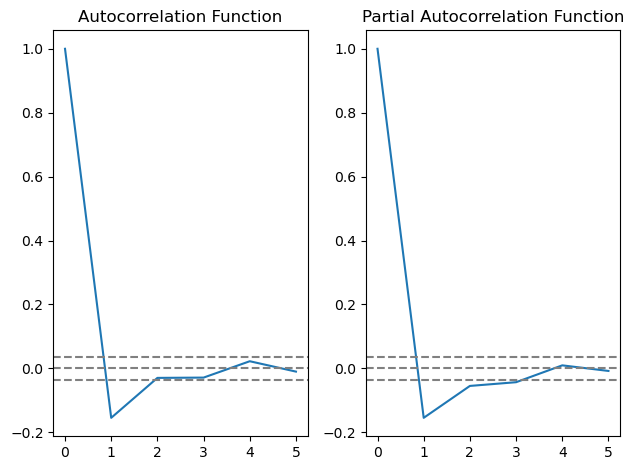

In [194]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf_det = acf(detrended_df_noOut, nlags=5)
lag_pacf_det = pacf(detrended_df_noOut, nlags=5, method='ols')

#Plot ACF (q -> model MA): 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(detrended_df_noOut)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(detrended_df_noOut)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF (p -> model AR): 
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(detrended_df_noOut)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(detrended_df_noOut)),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.tight_layout()

In [195]:
from statsmodels.tsa.arima.model import ARIMA
detrended_df_noOut.rename(columns={'_north(m)':'north(m)'}, inplace=True)
detrended_df_noOut

north(m)
YYMMMDD             
2010-06-13  0.003304
2010-06-14 -0.003366
2010-06-15 -0.001048
2010-06-18  0.000739
2010-06-19 -0.000256
...              ...
2019-06-30 -0.000285
2019-07-01  0.000974
2019-07-02 -0.001167
2019-07-03 -0.000535
2019-07-04  0.001119

[2933 rows x 1 columns]

In [196]:
#converting the index to datetime
detrended_df_noOut.index = pd.to_datetime(detrended_df_noOut.index)

#making sure that the index is in order
detrended_df_noOut.sort_index(inplace=True)

#setting the frequency as daily
detrended_df_noOut = detrended_df_noOut.asfreq('D')

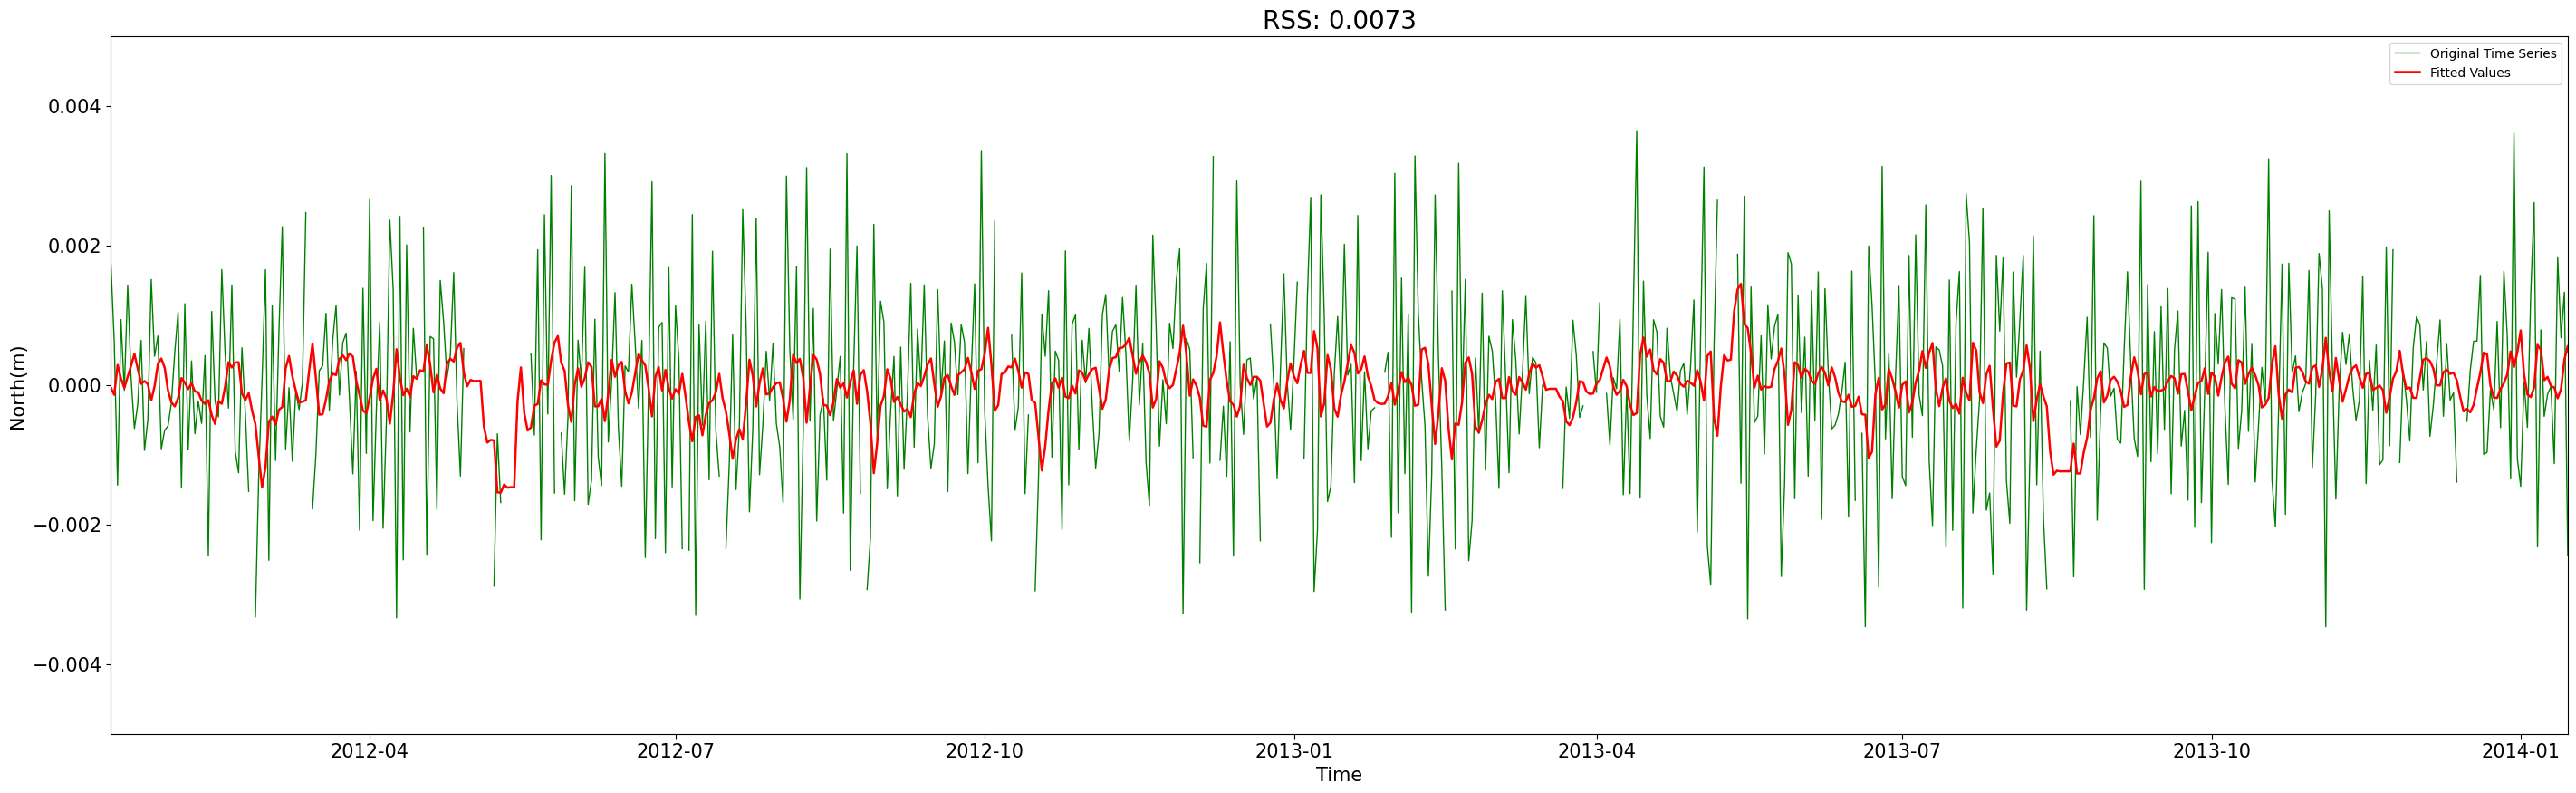

In [211]:
#combined - model ARIMA  p = 1 and q = 1:
#Auto-Regressive Integrated Moving Averages
model_ARIMA_df = ARIMA(detrended_df_noOut, order=(1, 1, 1))  
results_ARIMA_df = model_ARIMA_df.fit() 
model_df = results_ARIMA_df.fittedvalues

fig=plt.figure(figsize=(35,10))
plt.plot(detrended_df_noOut, color='green', label='Original Time Series', linewidth = 1.)
plt.plot(model_df,color='red', label='Fitted Values', linewidth= 1.8)

# Calculate Residual Sum of Squares (RSS)
residuals_ARIMA_df = model_df - detrended_df_noOut['north(m)']
rss_ARIMA_df = np.sum(residuals_ARIMA_df**2, axis=0)

plt.title(f'RSS: {rss_ARIMA_df:.4f}', fontsize=20)
plt.legend()
plt.xlabel('Time', fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(pd.Timestamp('2012-01-15'), pd.Timestamp('2014-01-15'))
plt.ylabel('North(m)', fontsize=15)
plt.ylim(-0.005,0.005)
plt.yticks(fontsize=15)

fl = 'brse_north_detrend.svg'
f = io.BytesIO()
plt.savefig(fl, format="svg")
plt.show()

In [207]:
#mean square error

from sklearn.metrics import mean_squared_error
#mse = mean_squared_error(detrended_df_noOut, model_df)

In [61]:
tsLogN = np.log1p(sitePeriodTime['_north(m)'])
tsLogN

YYMMMDD
2010-06-12    0.481209
2010-06-13    0.483105
2010-06-14    0.481174
2010-06-15    0.480573
2010-06-16    0.483334
                ...   
2019-06-30    0.576103
2019-07-01    0.576699
2019-07-02    0.575985
2019-07-03    0.575658
2019-07-04    0.576343
Name: _north(m), Length: 3058, dtype: float64

In [62]:
tsLogN_df = pd.DataFrame(tsLogN, index=tsLogN.index)
tsLogN_df

_north(m)
YYMMMDD              
2010-06-12   0.481209
2010-06-13   0.483105
2010-06-14   0.481174
2010-06-15   0.480573
2010-06-16   0.483334
...               ...
2019-06-30   0.576103
2019-07-01   0.576699
2019-07-02   0.575985
2019-07-03   0.575658
2019-07-04   0.576343

[3058 rows x 1 columns]

In [63]:
tsLogDiffN = tsLogN - tsLogN.shift()
tsLogDiffN

YYMMMDD
2010-06-12         NaN
2010-06-13    0.001896
2010-06-14   -0.001931
2010-06-15   -0.000601
2010-06-16    0.002761
                ...   
2019-06-30   -0.000174
2019-07-01    0.000596
2019-07-02   -0.000714
2019-07-03   -0.000327
2019-07-04    0.000685
Name: _north(m), Length: 3058, dtype: float64

In [64]:
tsLogDiffN.dropna(inplace = True)
tsLogDiffN

YYMMMDD
2010-06-13    0.001896
2010-06-14   -0.001931
2010-06-15   -0.000601
2010-06-16    0.002761
2010-06-17   -0.002326
                ...   
2019-06-30   -0.000174
2019-07-01    0.000596
2019-07-02   -0.000714
2019-07-03   -0.000327
2019-07-04    0.000685
Name: _north(m), Length: 3057, dtype: float64

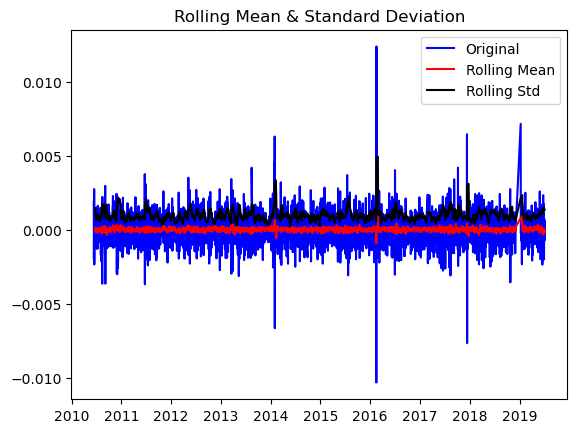

Results of Dickey-Fuller Test:
Test Statistic                  -26.682952
p-value                           0.000000
#Lags Used                        8.000000
Number of Observations Used    3048.000000
Critical Value (1%)              -3.432497
Critical Value (5%)              -2.862489
Critical Value (10%)             -2.567275
dtype: float64


In [65]:
test_stationarity(tsLogDiffN)

In [66]:
tsLogDiffN_df = pd.DataFrame(tsLogDiffN, index=tsLogDiffN.index)
tsLogDiffN_df

_north(m)
YYMMMDD              
2010-06-13   0.001896
2010-06-14  -0.001931
2010-06-15  -0.000601
2010-06-16   0.002761
2010-06-17  -0.002326
...               ...
2019-06-30  -0.000174
2019-07-01   0.000596
2019-07-02  -0.000714
2019-07-03  -0.000327
2019-07-04   0.000685

[3057 rows x 1 columns]

In [100]:
limiarZ = 1.0
tsLogDiffN_noOut = tsLogDiffN_df[(np.abs(tsLogDiffN_df-tsLogDiffN_df.mean()) 
                                              < limiarZ*tsLogDiffN_df.std())]
tsLogDiffN_noOut

north(m)
YYMMMDD             
2010-06-13       NaN
2010-06-14       NaN
2010-06-15 -0.000601
2010-06-16       NaN
2010-06-17       NaN
...              ...
2019-06-30 -0.000174
2019-07-01  0.000596
2019-07-02 -0.000714
2019-07-03 -0.000327
2019-07-04  0.000685

[3309 rows x 1 columns]

In [69]:
#removing the rows with missing values
tsLogDiffN_noOut.dropna(inplace=True)
tsLogDiffN_noOut

_north(m)
YYMMMDD              
2010-06-15  -0.000601
2010-06-18   0.000424
2010-06-19  -0.000147
2010-06-20   0.001010
2010-06-21   0.000976
...               ...
2019-06-30  -0.000174
2019-07-01   0.000596
2019-07-02  -0.000714
2019-07-03  -0.000327
2019-07-04   0.000685

[2280 rows x 1 columns]

from statsmodels.tsa.seasonal import seasonal_decompose

#data frame before checking the outliers
decompositionN = seasonal_decompose(tsLogDiffN_df, period=365)
trendN = decompositionN.trend
seasonalN = decompositionN.seasonal
residualN = decompositionN.resid

plt.subplot(411) 
plt.plot(tsLogDiffN_df, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trendN, label='T') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonalN,label='S') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residualN, label='R') 
plt.legend(loc='best') 
plt.tight_layout()

#making a copy of the data 
tsLogDiffN_noOut2= tsLogDiffN_noOut

#replacing the missing values for the mean
tsLogDiffN_noOut2.fillna(tsLogDiffN_noOut2.mean(), inplace = True)

plt.subplot(411) 
plt.plot(tsLogDiffN_noOut, label='rem')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(tsLogDiffN_noOut2, label='rep') 
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(loc='best') 

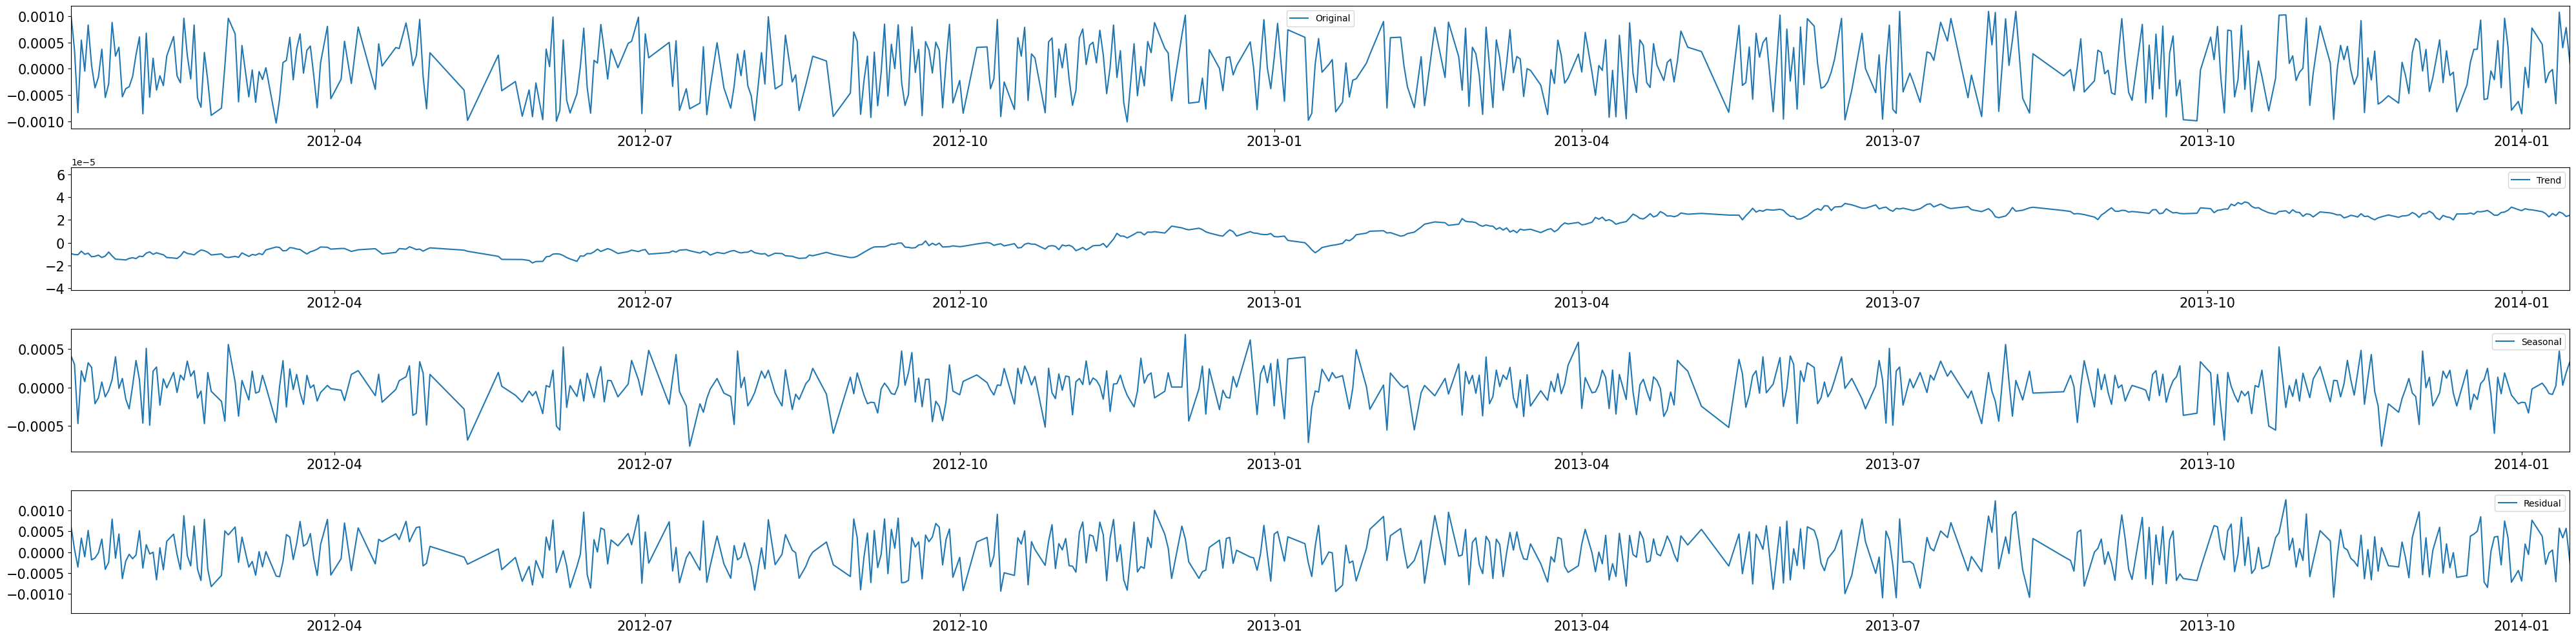

In [70]:
#data frame with outliers removed

decompositionN_outRem = seasonal_decompose(tsLogDiffN_noOut, period=365)
trendN_outRem = decompositionN_outRem.trend
seasonalN_outRem = decompositionN_outRem.seasonal
residualN_outRem = decompositionN_outRem.resid

fig=plt.figure(figsize=(40,10))

plt.subplot(411) 
plt.plot(tsLogDiffN_noOut, label='Original') 
plt.legend(loc='best')
plt.xticks(fontsize=15)
plt.xlim(pd.Timestamp('2012-01-15'), pd.Timestamp('2014-01-15'))
plt.yticks(fontsize=15)

plt.subplot(412) 
plt.plot(trendN_outRem, label='Trend') 
plt.legend(loc='best') 
plt.xticks(fontsize=15)
plt.xlim(pd.Timestamp('2012-01-15'), pd.Timestamp('2014-01-15'))
plt.yticks(fontsize=15)

plt.subplot(413) 
plt.plot(seasonalN_outRem,label='Seasonal') 
plt.legend(loc='best')
plt.xticks(fontsize=15)
plt.xlim(pd.Timestamp('2012-01-15'), pd.Timestamp('2014-01-15'))
plt.yticks(fontsize=15)

plt.subplot(414) 
plt.plot(residualN_outRem, label='Residual') 
plt.legend(loc='best') 
plt.xticks(fontsize=15)
plt.xlim(pd.Timestamp('2012-01-15'), pd.Timestamp('2014-01-15'))
plt.yticks(fontsize=15)

fl = 'brse_decomposition_north_1214.svg'
f = io.BytesIO()
plt.savefig(fl, format="svg")

plt.tight_layout()

#data frame with outliers replaced (1086 rows)
decompositionN_outRep = seasonal_decompose(tsLogDiffN_noOut2, period=365)
trendN_outRep = decompositionN_outRep.trend
seasonalN_outRep = decompositionN_outRep.seasonal
residualN_outRep = decompositionN_outRep.resid

plt.subplot(411) 
plt.plot(tsLogDiffN_noOut2, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trendN_outRep, label='T') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonalN_outRep,label='S') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residualN_outRep, label='R') 
plt.legend(loc='best') 
plt.tight_layout()

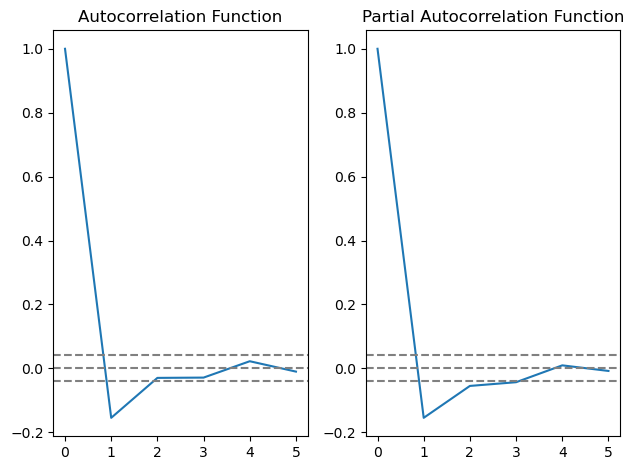

In [71]:
#ACF and PACF plots - rolling mean:

lag_acf = acf(tsLogDiffN_noOut, nlags=5)
lag_pacf = pacf(tsLogDiffN_noOut, nlags=5, method='ols')

#Plot ACF (q -> model MA): 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(tsLogDiffN_noOut)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(tsLogDiffN_noOut)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF (p -> model AR): 
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(tsLogDiffN_noOut)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(tsLogDiffN_noOut)),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.tight_layout()

In [72]:
#converting the index to datetime
tsLogDiffN_df.index = pd.to_datetime(tsLogDiffN_df.index)
#tsLogDiffN_noOut2.index = pd.to_datetime(tsLogDiffN_noOut2.index)
tsLogDiffN_noOut.index = pd.to_datetime(tsLogDiffN_noOut.index)
tsLogN_df.index = pd.to_datetime(tsLogN_df.index)

#making sure that the index is in order
tsLogDiffN_df.sort_index(inplace=True)
#tsLogDiffN_noOut2.sort_index(inplace=True)
tsLogDiffN_noOut.sort_index(inplace=True)
tsLogN_df.sort_index(inplace=True)

#setting the frequency as daily
tsLogDiffN_df = tsLogDiffN_df.asfreq('D')
#tsLogDiffN_noOut2 = tsLogDiffN_noOut2.asfreq('D')
tsLogDiffN_noOut = tsLogDiffN_noOut.asfreq('D')
tsLogN_df = tsLogN_df.asfreq('D')

In [75]:
#from statsmodels.tsa.arima.model import ARIMA

In [76]:
tsLogDiffN_df.rename(columns={'_north(m)':'north(m)'}, inplace=True)

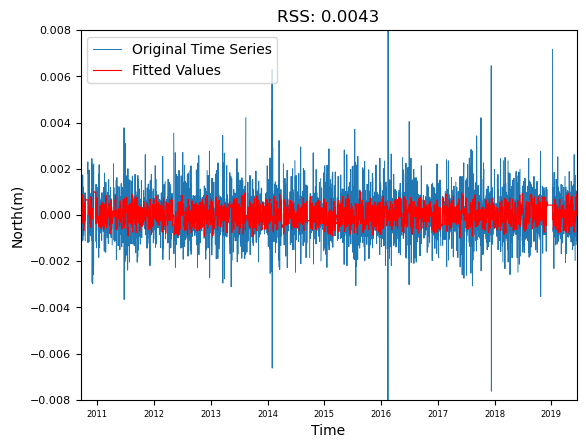

In [78]:
#model AR (Auto-Regressive) -> Plot PACF (p = 1)
modelN_AR = ARIMA(tsLogDiffN_noOut, order=(1, 1, 0))  
resultsN_AR = modelN_AR.fit()
plt.plot(tsLogDiffN_df,  label='Original Time Series', linewidth = 0.7)
plt.plot(resultsN_AR.fittedvalues, color='red', label='Fitted Values', linewidth= 0.8)

# Calculate Residual Sum of Squares (RSS)
residuals_AR = resultsN_AR.fittedvalues - tsLogDiffN_df['north(m)']
rss_AR = np.sum(residuals_AR**2, axis=0)

#Ensure rss is a scalar (float)
#rss_scalar = float(rss.iloc[0]) 

# Show the plot
plt.title(f'RSS: {rss_AR:.4f}')
plt.legend()
plt.xlabel('Time')
plt.xticks(fontsize=6)
plt.xlim(pd.Timestamp('2010-09-15'), pd.Timestamp('2019-06-13'))
plt.ylabel('North(m)')
plt.ylim(-0.008,0.008)
plt.yticks(fontsize=8)
plt.show()

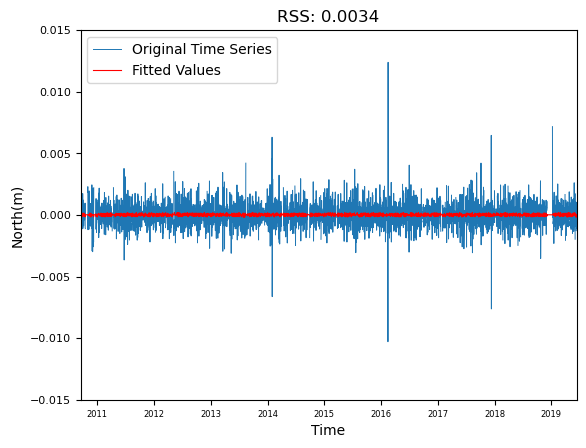

In [81]:
#model MA (Moving Averages) -> Plot ACF (q = 1)
model_MA = ARIMA(tsLogDiffN_noOut, order=(0, 0, 1))  
results_MA = model_MA.fit()  
plt.plot(tsLogDiffN_df, label='Original Time Series', linewidth = 0.7)
plt.plot(results_MA.fittedvalues, color='red', label='Fitted Values', linewidth= 0.8)

# Calculate Residual Sum of Squares (RSS)
residuals_MA = results_MA.fittedvalues - tsLogDiffN_df['north(m)']
rss_MA = np.sum(residuals_MA**2, axis=0)


plt.title(f'RSS: {rss_MA:.4f}')
plt.legend()
plt.xlabel('Time')
plt.xticks(fontsize=6)
plt.xlim(pd.Timestamp('2010-09-15'), pd.Timestamp('2019-06-13'))
plt.ylabel('North(m)')
plt.ylim(-0.015,0.015)
plt.yticks(fontsize=8)
plt.show()

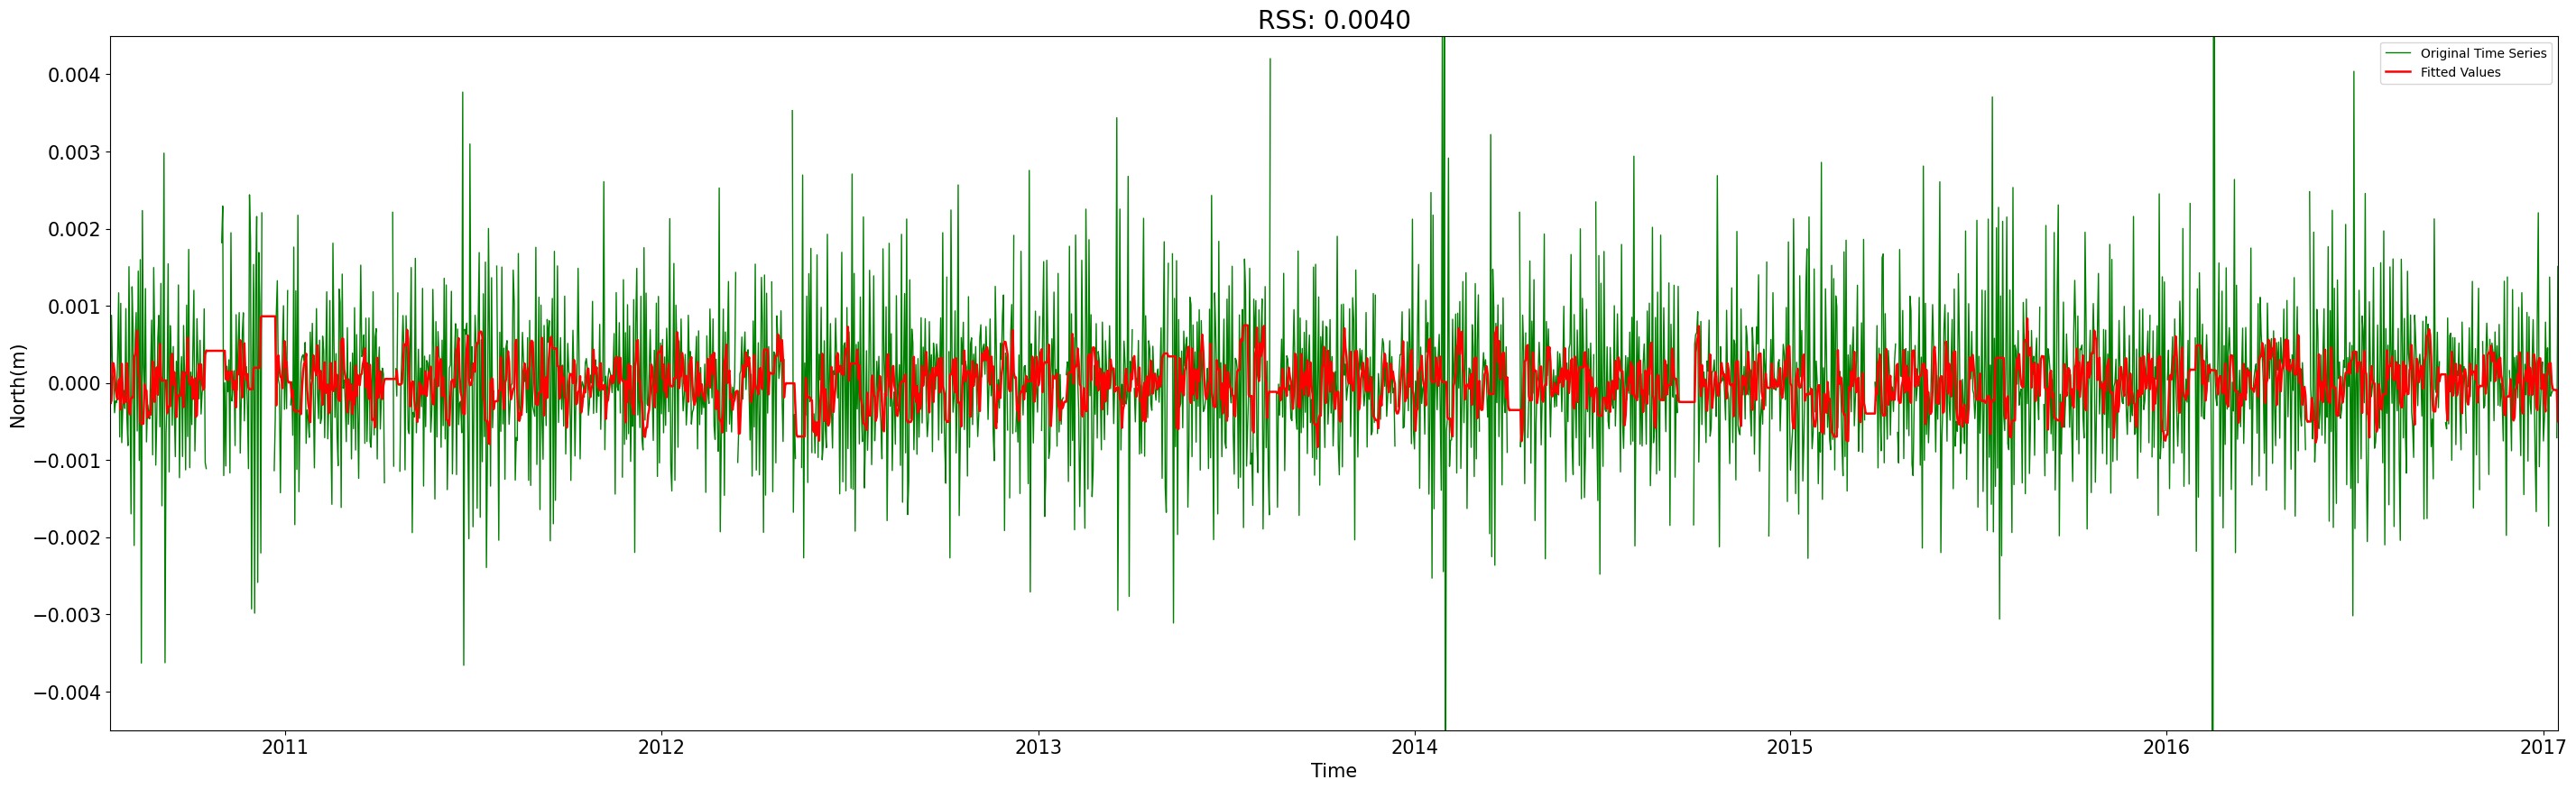

In [82]:
#combined - model ARIMA  p = 1 and q = 1:
#Auto-Regressive Integrated Moving Averages
model_ARIMA = ARIMA(tsLogDiffN_noOut, order=(1, 1, 1))  
results_ARIMA = model_ARIMA.fit() 

fig=plt.figure(figsize=(35,10))
plt.plot(tsLogDiffN_df, color='green', label='Original Time Series', linewidth = 1.)
plt.plot(results_ARIMA.fittedvalues,color='red', label='Fitted Values', linewidth= 1.8)

# Calculate Residual Sum of Squares (RSS)
residuals_ARIMA = results_ARIMA.fittedvalues - tsLogDiffN_df['north(m)']
rss_ARIMA = np.sum(residuals_ARIMA**2, axis=0)

plt.title(f'RSS: {rss_ARIMA:.4f}', fontsize=20)
plt.legend()
plt.xlabel('Time', fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(pd.Timestamp('2010-07-15'), pd.Timestamp('2017-01-15'))
plt.ylabel('North(m)', fontsize=15)
plt.ylim(-0.0045,0.0045)
plt.yticks(fontsize=15)

fl = 'brse_north.svg'
f = io.BytesIO()
plt.savefig(fl, format="svg")
#plt.show()

#ARIMA for outlier replaced
model_ARIMA_outDel = ARIMA(tsLogDiffN_noOut2, order=(1, 0, 1))
results_ARIMA_outDel = model_ARIMA_outDel.fit() 

#Plot rep: 
plt.subplot(121) 
plt.plot(tsLogDiffN_df, label='Original Time Series', linewidth = 0.4)
plt.plot(results_ARIMA.fittedvalues, color='red', label='Fitted Values', linewidth= 0.8)
plt.xlim(pd.Timestamp('2010-09-15'), pd.Timestamp('2011-03-15'))
plt.title('Outliers Replaced')

#Plot del: 
plt.subplot(122)
plt.plot(tsLogDiffN_df, label='Original Time Series', linewidth = 0.4)
plt.plot(results_ARIMA_outDel.fittedvalues, color='red', label='Fitted Values', linewidth= 0.8)
plt.xlim(pd.Timestamp('2010-09-15'), pd.Timestamp('2020-06-13'))
plt.title('Outliers Removed')
plt.tight_layout()

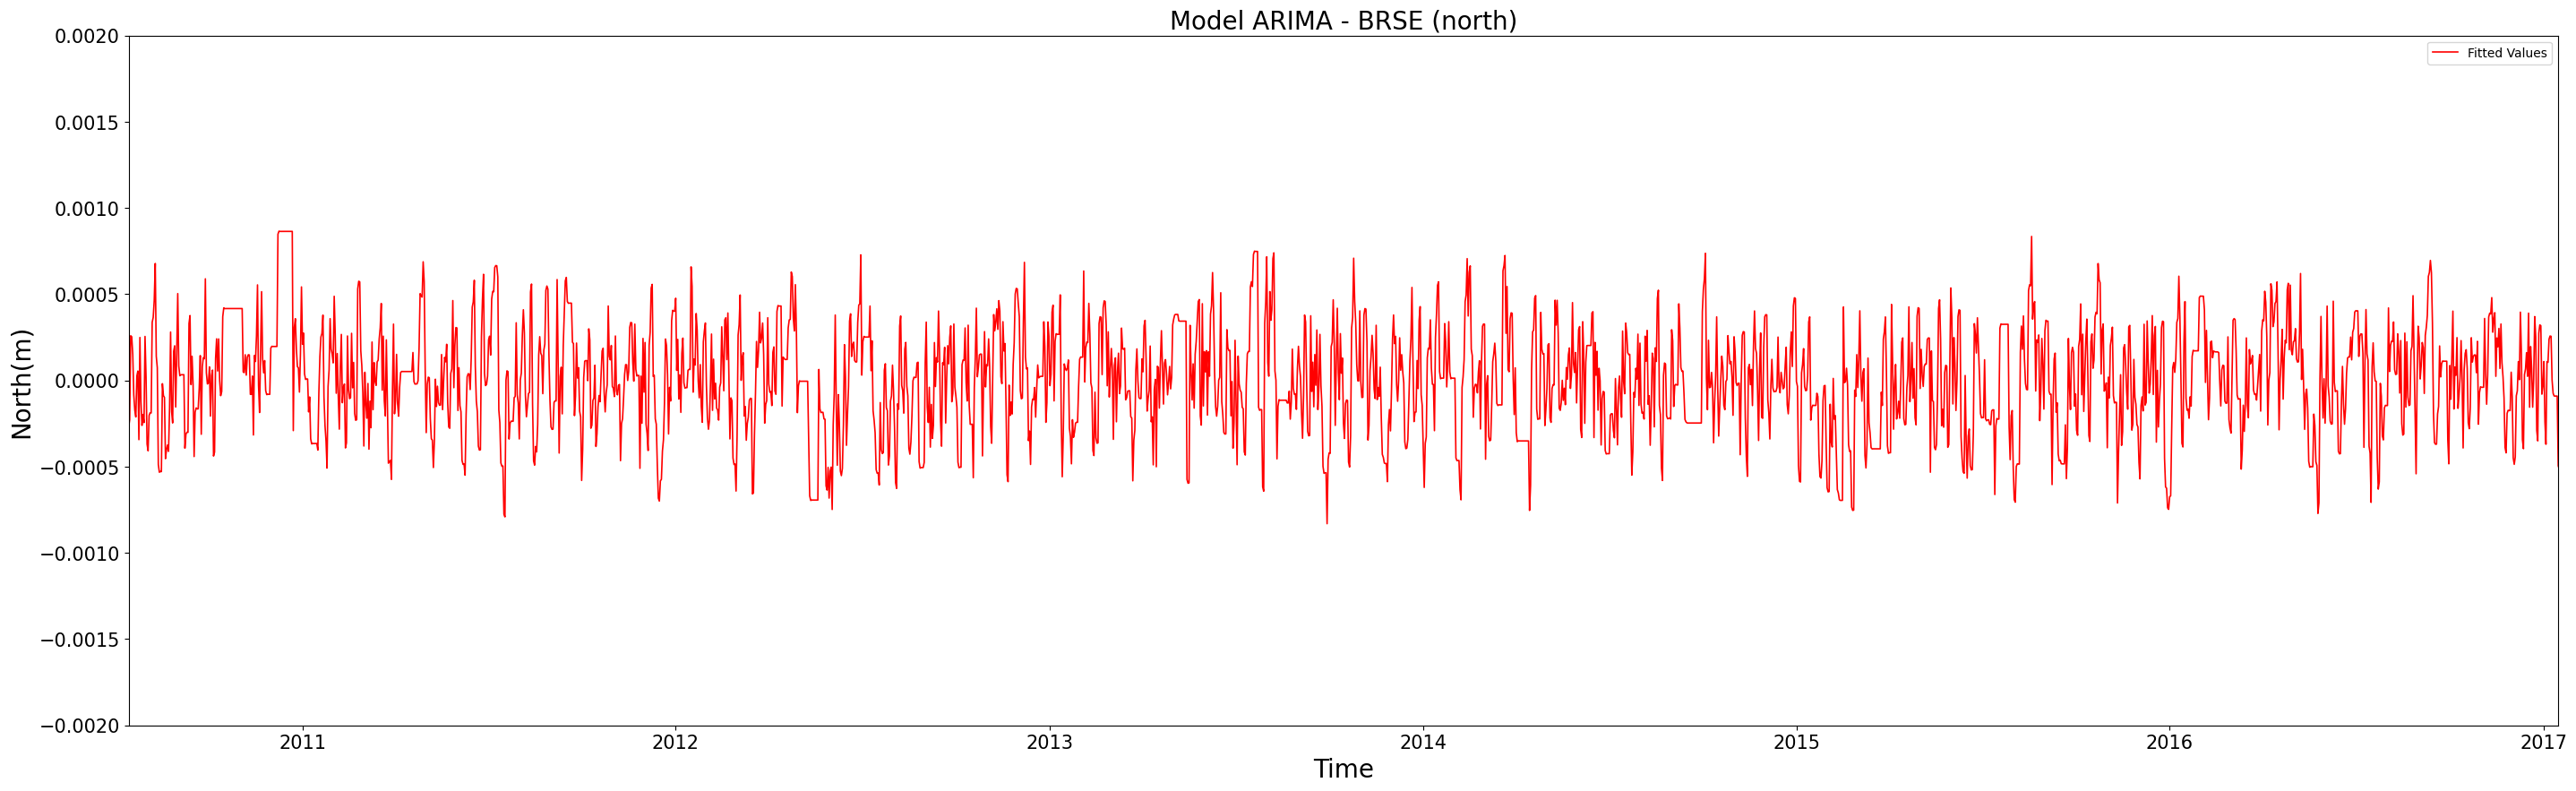

In [86]:
fig=plt.figure(figsize=(35,10))
plt.plot(results_ARIMA.fittedvalues, color='red', label='Fitted Values', linewidth= 1.2)
plt.xlim(pd.Timestamp('2012-01-15'), pd.Timestamp('2014-01-15'))

plt.title('Model ARIMA - BRSE (north)', fontsize=20)
plt.legend()
plt.xlabel('Time', fontsize=20)
plt.xticks(fontsize=15)
plt.xlim(pd.Timestamp('2010-07-15'), pd.Timestamp('2017-01-15'))
plt.ylabel('North(m)', fontsize=20)
plt.ylim(-0.002,0.002)
plt.yticks(fontsize=15)

fl = 'brse_arimas_north.svg'
f = io.BytesIO()
plt.savefig(fl, format="svg")

plt.show()

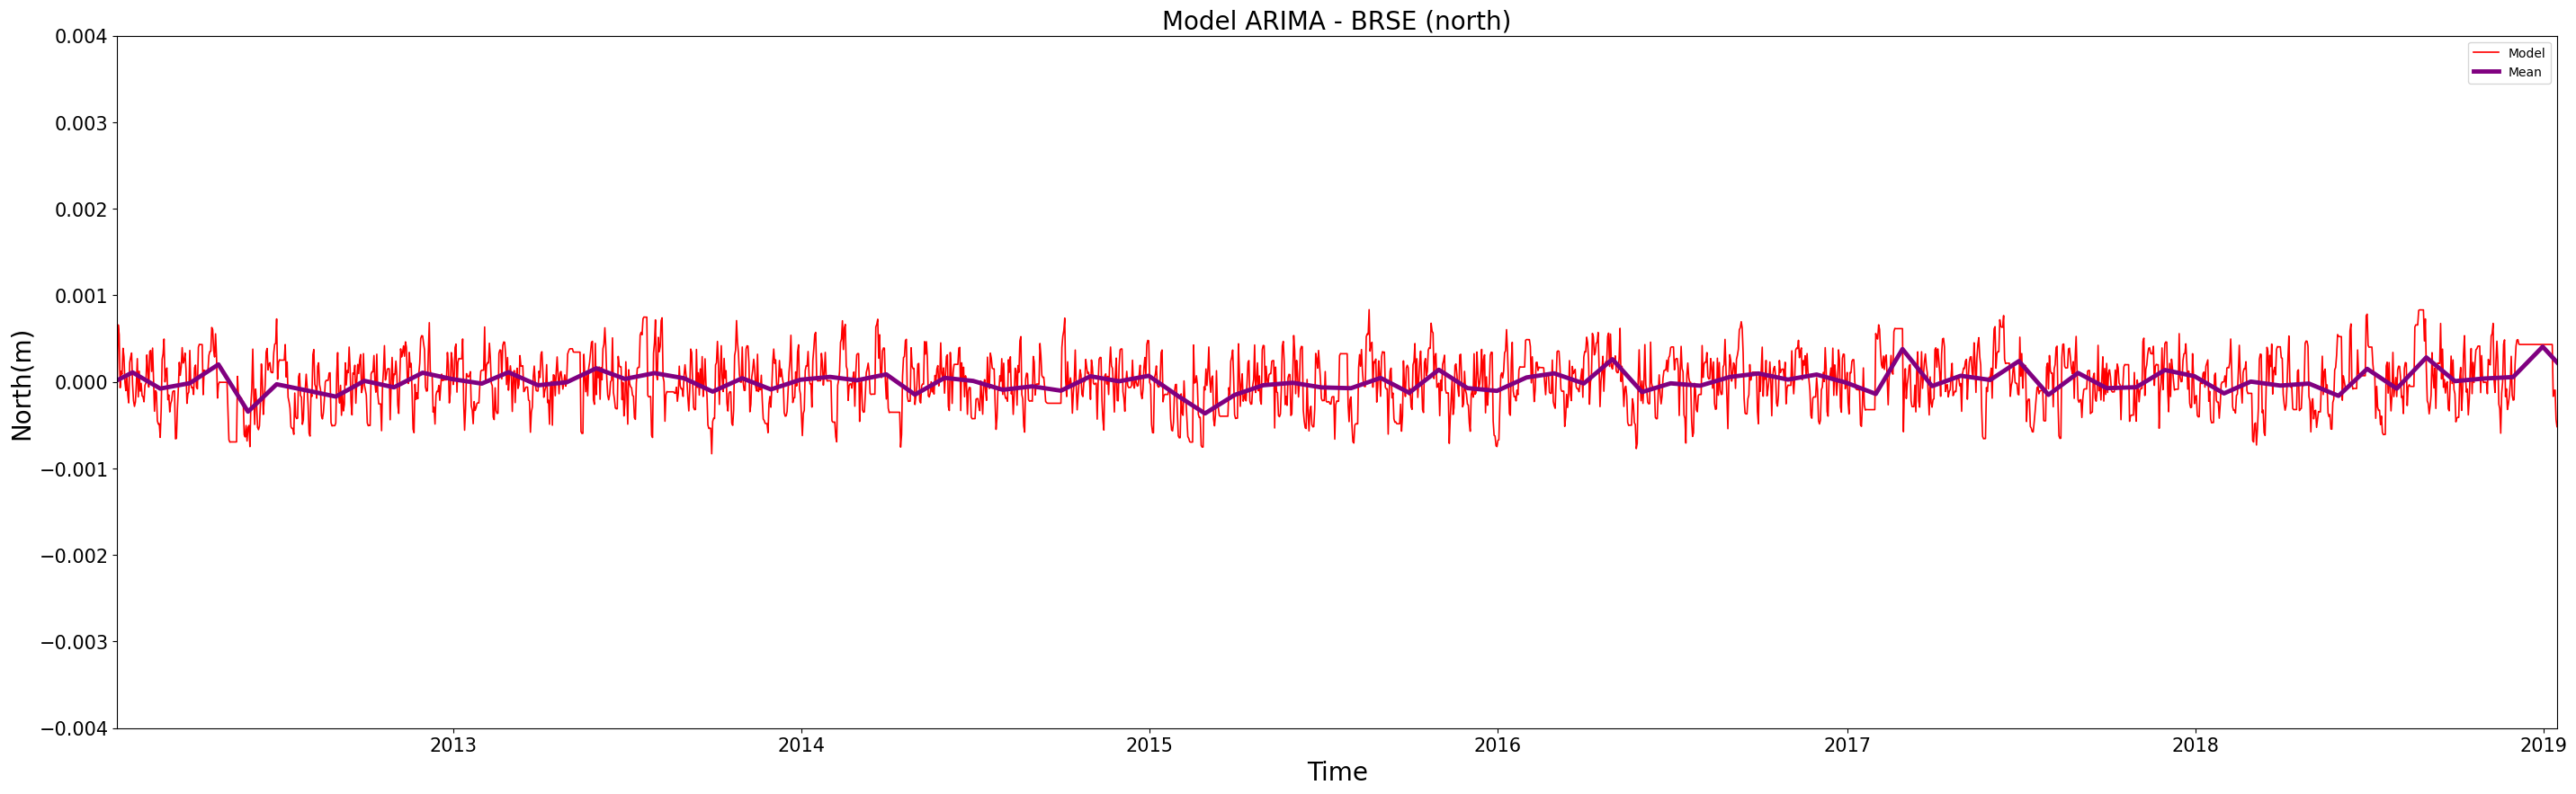

In [87]:
#converting the index to datetime
model = results_ARIMA.fittedvalues
model.index = pd.to_datetime(model.index)

#making sure that the index is in order
model.sort_index(inplace=True)

meanMonth = model.resample('M').mean()


fig=plt.figure(figsize=(35,10))
plt.plot(model, color='red', label='Model', linewidth= 1.2)
plt.plot(meanMonth, color='purple', label='Mean', lw=3.5)
#plt.xlim(pd.Timestamp('2011-12-31'), pd.Timestamp('2014-01-31'))

plt.title('Model ARIMA - BRSE (north)', fontsize=20)
plt.legend()
plt.xlabel('Time', fontsize=20)
plt.xticks(fontsize=15)
plt.xlim(pd.Timestamp('2012-01-15'), pd.Timestamp('2019-01-15'))
plt.ylabel('North(m)', fontsize=20)
plt.ylim(-0.004,0.004)
plt.yticks(fontsize=15)

plt.show()

In [ ]:
# train the model
ica = FastICA(n_components=2)
S_ = ica.fit_transform(X)  # estimated independent sources